In [ ]:
# Supervised ML

# Regression -- Simple Linear Regression

# First Machine Learning Project: Predict Student Marks Based On Hours Study

# Import All Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Stage 1 : Data Gathering

data = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Grade_Set_1.csv')
data

,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


In [ ]:
# Stage 2 : EDA

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      object
 3   Result         9 non-null      object
dtypes: int64(2), object(2)
memory usage: 420.0+ bytes


In [ ]:
# Stage 3 : Data Preparation
# a.) check for missing values
# b.) check for duplicate records
# c.) convert non-numerical features into numerical features
# d.) normalization
# e.) select independent and dependent variable

In [ ]:
#  a.) check for missing values

data.isnull().sum()

,0
Hours_Studied,0
Test_Grade,0
Status,0
Result,0


In [ ]:
# b.) check for duplicate records

data.duplicated().sum()

np.int64(0)

In [ ]:
# c.) convert non-numerical features into numerical features

import sklearn.preprocessing as pp            # to convert -ve lable = 0 and +ve lable = 1
lb = pp.LabelBinarizer()

data.Status = lb.fit_transform(data.Status)

# fail --> 0
# pass --> 1

data

,Hours_Studied,Test_Grade,Status,Result
0,2,57,0,D
1,3,66,0,D
2,4,73,1,C
3,5,76,1,C
4,6,79,1,C
5,7,81,1,B
6,8,90,1,B
7,9,96,1,A
8,10,100,1,A


In [ ]:
'''
yes no

fail pass

True False

absent  present

good bad

dead alive

'sucess','no-sucess'
 '''

lb.fit_transform(['yes','no'])    # syntex to check label binarizer can conver our -ne, +ve label

array([[1],
       [0]])

In [ ]:
# d.) normalization
#   Normalization is a part of data preparation
#   Goal of normalization is to change the values of numeric columns into scale of [0 and 1]
#   We need normalization when features are in a Different Range
#   When normalize data we not changing its meaning --> just changing its scale, so model can learn efficiently
#   After normalization features are on comparable scale
#   45000 <--> 0.0422 , model trains on 0.0422 instead 45000
#   For machine learning, every dataset does not require normalization. It is
#   Required only when features have different ranges.

'''
age   income     normalizedValues

16     45000        0.0422
17     67000        0.1136
18     32000
19     78000
20     100000
21     340000

income   Xmax == 340000    Xmin == 32000   x = 45000

    X - Xmin                    45000 - 32000
  --------------    ==>       ----------------  ==> 0.0422
   Xmax - Xmin                 340000 - 32000


income   Xmax == 340000    Xmin == 32000   x = 67000

    X - Xmin                    67000 - 32000
  --------------    ==>       ----------------  ==> 0.1136
   Xmax - Xmin                 340000 - 32000




Example syntex to nomalize:

    vals = data.Test_Grade.values
    print(vals)

    normlz = pp.normalize([vals])
    print(normlz)

'''

'\nage   income     normalizedValues\n\n16     45000        0.0422\n17     67000        0.1136\n18     32000\n19     78000\n20     100000\n21     340000\n\nincome   Xmax == 340000    Xmin == 32000   x = 45000\n\n    X - Xmin                    45000 - 32000\n  --------------    ==>       ----------------  ==> 0.0422\n   Xmax - Xmin                 340000 - 32000\n\n\nincome   Xmax == 340000    Xmin == 32000   x = 67000\n\n    X - Xmin                    67000 - 32000\n  --------------    ==>       ----------------  ==> 0.1136\n   Xmax - Xmin                 340000 - 32000\n\n\n\n\nExample syntex to nomalize:\n\n    vals = data.Test_Grade.values\n    print(vals)\n\n    normlz = pp.normalize([vals])\n    print(normlz)\n\n'

In [ ]:
# e.) select independent and dependent variable
# Independent Variable --> Input
# scikit-learn expects X to be 2D even if you have only one feature

X = data.Hours_Studied.values
X = X.reshape(9,1)
X

array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
# Dependent Variable --> Output that we are predict
Y = data.Test_Grade.values
Y

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [ ]:
#Stage 4 : Model Development
#Applying a suitable ML Algo On Dataset

import sklearn.linear_model as lm
lin_reg = lm.LinearRegression()

lin_reg.fit(X,Y)

LinearRegression()

In [ ]:
import pickle

pickle.dump(lin_reg,open('lin_reg_model.pkl','wb'))

In [ ]:
# Stage 5 : Model Evaluation

data['Predicted_Values'] = lin_reg.predict(X)

In [ ]:
data[['Hours_Studied','Test_Grade','Predicted_Values']]

,Hours_Studied,Test_Grade,Predicted_Values
0,2,57,59.711111
1,3,66,64.727778
2,4,73,69.744444
3,5,76,74.761111
4,6,79,79.777778
5,7,81,84.794444
6,8,90,89.811111
7,9,96,94.827778
8,10,100,99.844444


In [ ]:
pred_values = lin_reg.predict(X)
print(pred_values)

[59.71111111 64.72777778 69.74444444 74.76111111 79.77777778 84.79444444
 89.81111111 94.82777778 99.84444444]


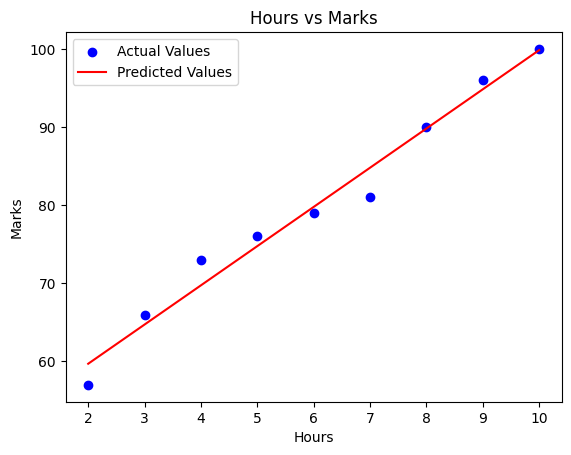

In [ ]:
# Plot Actual Values
plt.scatter(X,Y,color='blue', label='Actual Values')
# Plot The Predicted Values
plt.plot(X,pred_values,color='red',label='Predicted Values')
plt.title('Hours vs Marks')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()
plt.show()

In [ ]:
# R-squared
# help you to know how well the explain the data
# or how well the model fits the data

from sklearn.metrics import r2_score
accuracy = r2_score(Y,pred_values)

print('Regression Score Function:',accuracy)
print(f'Regression Score Function: {int(accuracy*100)}%')

Regression Score Function: 0.9757431074095347
Regression Score Function: 97%


In [ ]:
# Stage 6 : Final Predictions

hrs = float(input('Enter The Number Of Hours Studies: '))
predict_marks = lin_reg.predict([[hrs]])
print(f'Student Who Studied {hrs} Hours Will Score {int(predict_marks[0])} marks.')     # not perfect code yet

Enter The Number Of Hours Studies: 6.5
Student Who Studied 6.5 Hours Will Score 82 marks.


In [ ]:
hrs = float(input('Enter The Number Of Hours Studies: '))
if hrs>=1 and hrs<=10:
  predict_marks = lin_reg.predict([[hrs]])
  print(f'Student Who Studied {hrs} Hours Will Score {int(predict_marks[0])} marks.')
else:
  print('Note: Machine Learning Model Prediction')
  print('Please Enter The Hours Between 1 Till 10')

Enter The Number Of Hours Studies: 6.5
Student Who Studied 6.5 Hours Will Score 82 marks.
